In [75]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

# Load the training data into a pandas DataFrame (assuming you have a CSV file)
train_data = pd.read_csv('preprocessed_data_bbc.csv')

# Extract the cleaned text and corresponding labels
X = train_data['Text'].values
y = train_data['Category'].values


In [76]:
# Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(min_df=0.002, max_df=0.95, norm='l2', ngram_range=(1, 2), stop_words='english', sublinear_tf=True)
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Build KNN model
classifier_knn = KNeighborsClassifier(n_neighbors=23,algorithm='brute')

# Train the model
classifier_knn.fit(X_train, y_train)

# Predict the labels for the training data
y_train_pred = classifier_knn.predict(X_train)

In [78]:
# Generate the classification report for training data
train_report = classification_report(y_train, y_train_pred)

# Print the classification report for training data
print("Training Classification Report:")
print(train_report)

# Predict the labels for the testing data
y_test_pred = classifier_knn.predict(X_test)

# Generate the classification report for testing data
test_report = classification_report(y_test, y_test_pred)

# Print the classification report for testing data
print("Testing Classification Report:")
print(test_report)

Training Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.95      0.97       261
entertainment       1.00      0.96      0.98       227
     politics       0.95      0.98      0.97       218
        sport       1.00      1.00      1.00       283
         tech       0.95      0.98      0.96       203

     accuracy                           0.97      1192
    macro avg       0.97      0.97      0.97      1192
 weighted avg       0.98      0.97      0.97      1192

Testing Classification Report:
               precision    recall  f1-score   support

     business       0.99      0.97      0.98        75
entertainment       1.00      1.00      1.00        46
     politics       0.95      0.95      0.95        56
        sport       0.98      1.00      0.99        63
         tech       0.97      0.97      0.97        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       2

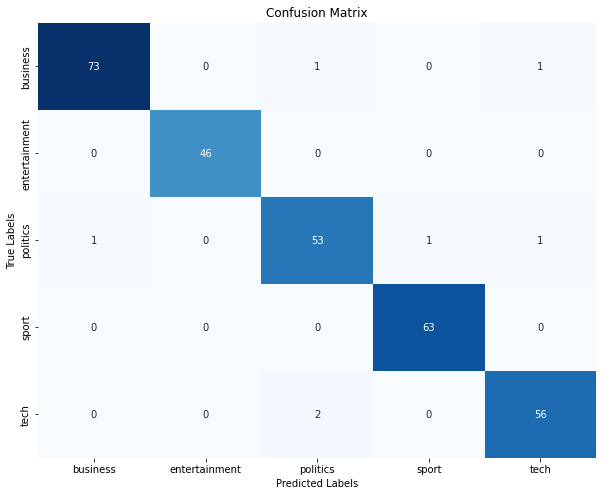

In [79]:
# Generate the confusion matrix for testing data
cm = confusion_matrix(y_test, y_test_pred)

# Get the unique category labels
categories = np.unique(y)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [80]:
# Plot learning curves
def plot_learning_curve(train_sizes, train_scores, test_scores, fig_title):  
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
    plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title(fig_title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

[learning_curve] Training set sizes: [ 119  387  655  923 1192]
[CV] END ..................., score=(train=0.950, test=0.893) total time=   0.0s
[CV] END ..................., score=(train=0.966, test=0.946) total time=   0.0s
[CV] END ..................., score=(train=0.974, test=0.983) total time=   0.0s
[CV] END ..................., score=(train=0.977, test=0.970) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ..................., score=(train=0.974, test=0.960) total time=   0.0s
[CV] END ..................., score=(train=0.882, test=0.923) total time=   0.0s
[CV] END ..................., score=(train=0.964, test=0.946) total time=   0.0s
[CV] END ..................., score=(train=0.974, test=0.953) total time=   0.0s
[CV] END ..................., score=(train=0.979, test=0.953) total time=   0.0s
[CV] END ..................., score=(train=0.977, test=0.950) total time=   0.0s
[CV] END ..................., score=(train=0.882, test=0.913) total time=   0.0s
[CV] END ..................., score=(train=0.972, test=0.960) total time=   0.0s
[CV] END ..................., score=(train=0.962, test=0.970) total time=   0.0s
[CV] END ..................., score=(train=0.967, test=0.973) total time=   0.0s
[CV] END ..................., score=(train=0.975, test=0.977) total time=   0.0s
[CV] END ..................., score=(train=0.882, test=0.936) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.4s finished


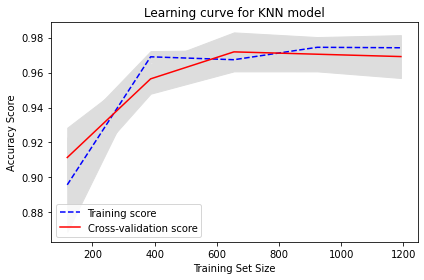

In [81]:
train_sizes, train_scores, test_scores = learning_curve(classifier_knn, X, y, verbose=3)

# Plot learning curves
plot_learning_curve(train_sizes, train_scores, test_scores, 'Learning curve for KNN model')

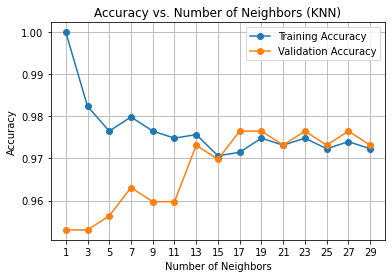

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the training data into a pandas DataFrame (assuming you have a CSV file)
train_data = pd.read_csv('preprocessed_data_bbc.csv')

# Extract the cleaned text and corresponding labels
X = train_data['Text'].values
y = train_data['Category'].values

# Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(min_df=0.002, max_df=0.95, norm='l2', ngram_range=(1, 2), stop_words='english', sublinear_tf=True)
X = vectorizer.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of n_neighbors with a step of 2
n_neighbors_range = range(1, 30, 2)
train_accuracy_scores = []
val_accuracy_scores = []

# Iterate over the range of n_neighbors
for n_neighbors in n_neighbors_range:
    # Build KNN model
    classifier_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the model
    classifier_knn.fit(X_train, y_train)

    # Predict the labels for training set
    y_train_pred = classifier_knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(train_accuracy)

    # Predict the labels for validation set
    y_val_pred = classifier_knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_scores.append(val_accuracy)

# Plot the graph
plt.plot(n_neighbors_range, train_accuracy_scores, marker='o', label='Training Accuracy')
plt.plot(n_neighbors_range, val_accuracy_scores, marker='o', label='Validation Accuracy')
plt.title('Accuracy vs. Number of Neighbors (KNN)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(n_neighbors_range)
plt.legend()
plt.grid(True)
plt.show()
